# CÁC THUẬT TOÁN GIẢM CHIỀU DỮ LIỆU DÀNH CHO TRỰC QUAN DỮ LIỆU:

In [50]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as plt_io
plt_io.renderers.default = "notebook"
from IPython.display import display, Image

import warnings
warnings.filterwarnings("ignore")

In [16]:
def map_labels(pred, labels):
    mapping = {
        '0': -1, '1': -1, '2': -1, '3': -1, '4': -1,
        '5': -1, '6': -1, '7': -1, '8': -1, '9': -1,
        '10': -1, '11': -1, '12': -1, '13': -1
    }
    
    for i in range(len(y)):
        fill_done = True

        for val in mapping.values():
            if val == -1:
                fill_done = False
                break
            
        if fill_done:
            break

        if mapping[str(pred[i])] == -1:
            mapping[str(pred[i])] = labels[i]

    temp_labels = pred.copy()

    for i in range(len(labels)):
        temp_labels[i] = mapping[str(temp_labels[i])]
        
    return temp_labels

### $\textbf{1. PCA (Principle Component Analysis):}$

- `PCA` hay còn gọi là *Phân tích thành phần chính* là một trong những thuật toán `unsupervised` giảm chiều dữ liệu được xem là phổ biến nhất. 

- Cơ chế hoạt động của `PCA` là tìm siêu phẳng (*hyperplane*) nằm gần dữ liệu nhất và `chiếu` dữ liệu lên siêu phẳng này mà vẫn `giữ` được hầu hết các `đặc tính` của dữ liệu.

- Trục tọa độ mà khi chiếu dữ liệu lên có thể giữ được phần lớn dữ liệu (*đặc trưng bằng* `amount of variance`) trên tập train được gọi là `Principle Components`.

- Thành phần thứ hai (*second principle component*) sẽ `trực giao` với thành phần thứ nhất, thành phần thứ ba sẽ `trực giao` với hai thành phần đầu,... tùy vào `số chiều` của dữ liệu. 

- Cho mục đích `trực quan` chúng ta sẽ gắn liền với `hai` hoặc `nhiều nhất là ba` thành phần chính của dữ liệu.

- Việc `chọn đúng siêu phẳng` để chiếu dữ liệu lên rất quan trọng để tìm ra được những thành phần giúp cho chúng ta giảm chiều dữ liệu hiệu quả.

#### $\textbf{CÁC BƯỚC THỰC HIỆN PCA:}$

1. Đầu tiên ta cần `xem xét dữ liệu` và `plot dữ liệu` (*nếu cần*) để quan sát dữ liệu:

In [5]:
data = pd.read_csv ('data3.csv')
display (data.head (5))

,Unnamed: 0,labels,num_labels,FT0,FT1,FT2,FT3,FT4,FT5,FT6,...,FT38,FT39,FT40,FT41,FT42,FT43,FT44,FT45,FT46,FT47
0,0,Drink_glass,0,2.694958,3.790299,6.710054,2.383583,5.213972,1.841685,1.867810,...,11.812205,11.086036,21.077241,183.620641,133.026637,465.492918,1449.887143,2039.181048,3610.008857,63.980880
1,1,Drink_glass,0,1.527453,0.974374,8.921903,2.015233,3.964369,1.127449,0.466952,...,9.928688,8.127150,20.714786,109.324003,73.826886,432.605228,687.353905,928.076963,4014.856571,50.457775
2,2,Drink_glass,0,2.319197,6.658395,6.480261,2.785700,2.460621,1.060052,1.167381,...,7.937667,13.900350,15.811646,68.065921,208.462817,253.144705,626.183143,1797.766667,1749.670571,44.578268
3,3,Drink_glass,0,2.471946,2.783247,9.031703,2.035693,2.022640,0.665546,0.933905,...,11.293990,11.551437,18.619167,143.816928,163.188645,346.067768,875.068762,985.269524,3197.222952,43.722931
4,4,Drink_glass,0,1.283190,1.631856,8.931548,2.400873,3.597436,1.194292,0.466952,...,11.768623,9.485888,26.825795,150.283564,95.972407,727.152448,1046.724374,1276.559294,6734.387238,61.130331


In [20]:
X = data.drop(columns=['Unnamed: 0', 'labels', 'num_labels'])
y = data['labels']

2. Nếu các dữ liệu nằm ở các khoảng khác nhau, ta nên `chuẩn hóa dữ liệu` để giảm chiều được hiệu quả:

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
scaler = PowerTransformer()
scaler.fit(X)
X_scaled = scaler.transform(X)

from sklearn.preprocessing import LabelEncoder
LaEn = LabelEncoder()
LaEn.fit(y)
y_en = LaEn.transform(y)

##### $\textbf{Dùng thư viện `sklearn`:}$

In [22]:
from sklearn.decomposition import PCA

pca = PCA (n_components = 10, random_state=1089)
data_PCA = pca.fit (X_scaled).transform (X_scaled)

In [23]:
print ('Explained variance ratio (first ten components): \n%s'
    % str (pca.explained_variance_ratio_))

sum(pca.explained_variance_ratio_)

Explained variance ratio (first ten components): 
[0.2428756  0.21223876 0.1783519  0.07952954 0.04494329 0.039571
 0.02617957 0.02445624 0.01786287 0.01686655]


0.8828753187554325

In [24]:
n = pca.n_components_
cols = ['PC'+str(i) for i in range(1,n+1)]
df_PCA = pd.DataFrame(data=data_PCA, columns=cols)
df_PCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-3.900776,3.413824,1.074531,0.731540,-2.843216,0.472149,1.314840,-2.594886,-0.671618,0.363083
1,-5.447159,2.404792,-1.139556,-2.440313,1.302580,-0.477933,-1.671628,-0.670473,-1.701619,0.120980
2,-5.517813,0.550271,-1.466039,2.594298,-2.928699,1.051387,-1.085567,-1.021418,-1.552004,0.320423
3,-5.145028,2.217152,-2.084208,-1.086351,0.019246,-0.027569,-1.307235,-0.243417,-0.669058,0.673836
4,-3.459956,4.129119,0.402800,-2.116078,1.222313,-0.125950,-0.505973,0.890509,-2.035717,0.287007


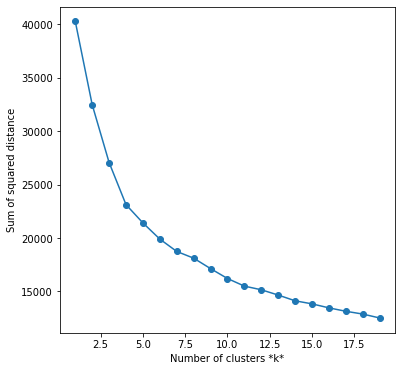

In [25]:
from sklearn.cluster import KMeans
# Run the Kmeans algorithm and get the index of data points clusters

sse = []
list_k = list(range(1, 20))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_scaled)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [26]:
kmean = KMeans(n_clusters=14, random_state=89)
df_PCA['Cluster'] = kmean.fit_predict(df_PCA)

df_PCA.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Cluster
0,-3.900776,3.413824,1.074531,0.731540,-2.843216,0.472149,1.314840,-2.594886,-0.671618,0.363083,8
1,-5.447159,2.404792,-1.139556,-2.440313,1.302580,-0.477933,-1.671628,-0.670473,-1.701619,0.120980,8
2,-5.517813,0.550271,-1.466039,2.594298,-2.928699,1.051387,-1.085567,-1.021418,-1.552004,0.320423,8
3,-5.145028,2.217152,-2.084208,-1.086351,0.019246,-0.027569,-1.307235,-0.243417,-0.669058,0.673836,8
4,-3.459956,4.129119,0.402800,-2.116078,1.222313,-0.125950,-0.505973,0.890509,-2.035717,0.287007,8
5,-6.034230,0.181407,-2.697628,-4.265914,0.458393,-0.267109,-0.972624,0.923924,-0.523742,0.366706,3
6,-5.655054,1.912264,0.932673,-0.927683,-1.318370,-0.068816,-0.267885,-0.221836,-0.105808,-0.589187,8
7,-5.862554,2.206742,-0.161136,-2.369760,-0.852519,-0.739211,0.327988,-0.829802,-0.289591,0.675120,8
8,-5.425043,2.562701,-0.564843,-0.004613,-1.750214,0.468554,0.489462,-0.817312,-1.027160,0.289725,8
9,-4.502974,1.237832,-0.059155,2.303030,-2.197991,1.332751,0.194365,-0.497203,-0.850331,1.038379,8


In [27]:
from sklearn.metrics import accuracy_score, completeness_score

mapped_pred = map_labels(df_PCA['Cluster'], y_en)
print(completeness_score(y_en, mapped_pred))

0.7496196830575581


### $\textbf{2. t-SNE (t-distributed Stochastic Neighbour Embedding):}$

- `t-SNE` là thuật toán đựơc tạo ra năm $2008$ nhằm mục đích phù hợp với việc trực quan các bộ dữ liệu có `số chiều lớn`.

- `t-SNE` sẽ lấy tập dữ liệu có `số chiều lớn` và cố `giảm chiều nó thành biểu đồ` có `số chiều nhỏ hơn` mà vẫn `giữ lại` các thông tin lân cận của các điểm dữ liệu.

- `t-SNE` có thể làm như thế vì nó hoạt động theo cơ chế `cung cấp` cho mỗi điểm dữ liệu một `vị trí` trên biểu đồ $2$- chiều hoặc $3$- chiều.

- Phương pháp này `tìm` các cluster (*cụm*) trong dữ liệu đảm bảo có một embedding (*phép nhúng*) `bảo toàn ý nghĩa dữ liệu`.

- `t-SNE` giảm chiều dữ liệu khi mô hình hóa các `đối tượng tương tự nhau` bằng các điểm ở `gần` nhau và các `đối tượng không tương tự` nhau bằng các điểm ở `xa` nhau.

In [ ]:
from IPython.display import Image

- Công thức tính `sự tương đồng` giữa hai điểm $x_i, x_j$ trong không gian `gốc`:

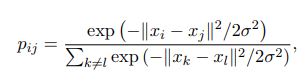

In [ ]:
Image ('pij.png', width = 800, height = 300)

- Công thức tính `sự tương đồng` giữa $y_i, y_j$ trong không gian `mới`:

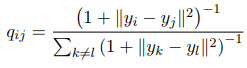

In [ ]:
Image ('qij.png', width = 800, height = 300)

- Công thức tính sai khác giữa hai phân phối bằng `KL-divergence`:

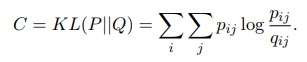

In [ ]:
Image ('KL.png', width = 800, height = 200)

- Đạo hàm $C$ để cập nhật $y_i$ (*gradient descent*):

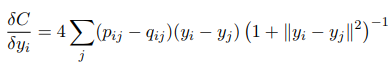

In [ ]:
Image ('gradient_descent.png', width = 800, height = 200)

In [28]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42, n_components=3, verbose=0,
            perplexity=40, n_iter=300).fit_transform(X_scaled)

/home/zlatantien/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/zlatantien/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


/tmp/ipykernel_14955/1140153462.py:1: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



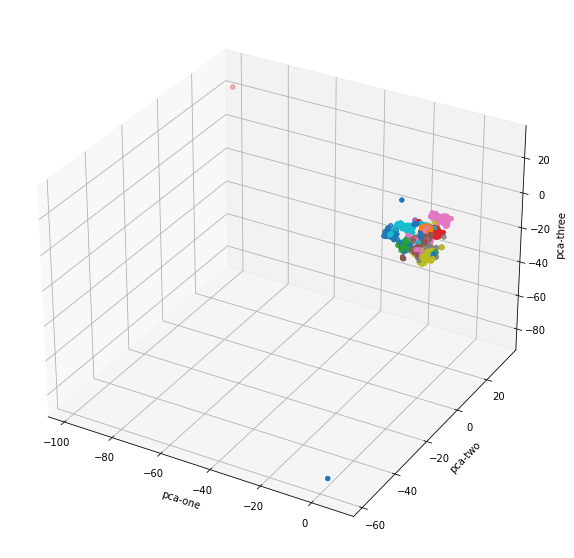

In [40]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=tsne[:,0], 
    ys=tsne[:,1], 
    zs=tsne[:,2], 
    c=y_en, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

### $\textbf{3. LDA (Linear Discriminant Analysis):}$

- `LDA` là thuật toán `supervised` hiệu quả không chỉ trong `giảm chiều dữ liệu` mà còn là thuật toán hữu hiệu trong bài toán `phân loại` (*classification*).

- Đích đến của thuật toán này là chiếu bộ dữ liệu lên không gian có chiều nhỏ hơn với khả năng `phân loại` tốt, tránh overfitting và giảm chi phí tính toán.

- Tương đồng với cách tiếp cận nhưng thay vì tìm thành phần chính có `percent_of_variance_explained` nhiều nhất như `PCA`, `LDA` ưu tiên tìm thành phần có thể `phản ánh rõ nhất sự phân lớp` giữa các class của dữ liệu.

- Vậy để dễ dàng `classify` thì `LDA` sẽ cố `tăng` khoảng cách giữa hai kỳ vọng và `giảm` độ lệch chuẩn của các bộ dữ liệu.

- Trong `LDA` cho `Multi-class Classification Problems`, ta sẽ cố `tăng sự khác biệt giữa các class` và `giảm sự khác biệt trong từng thành phần của cùng class`.

- Độ phân tán của một tập dữ liệu được tính bằng `tổng bình phương khoảng cách từ mỗi điểm tới vector kỳ vọng của chúng`. 

- Nếu tất cả các điểm `gần vector kỳ vọng` thì `độ phân tán` của tập dữ liệu coi là `nhỏ`. 

- Ngược lại khi `các điểm xa trung tâm` thì tập này được xem là `độ phân tán cao`. 

- Để đại diện cho sự tương đồng giữa các thành phần trong `cùng một class`, người ta xét đến `within-class matrix`.

- Tương tự để đại diện cho sự khác nhau `giữa các class`, ta xét `between-class matrix`.

#### $\textbf{CÁC BƯỚC THỰC HIỆN LDA:}$

- Ở đây không đề cập các bước chi tiết LDA vì đã làm trong bài tập thực hành HDA Lab 02, nhưng LDA áp dụng cho các bài toán supervised learning nên không dùng được cho bài toán của chúng ta. 

##### $\textbf{Hoặc chúng ta có thể dùng thư viện `sklearn`:}$

### $\textbf{4. UMAP (Uniform Manifold Approximation and Projection):}$

- `UMAP` được tạo ra năm $2018$ để phục vụ đa dạng mục đích `học tập` và `giảm chiều dữ liệu`.

- `UMAP` là phương pháp giảm chiều dữ liệu dùng cho trực quan hóa dữ liệu tương tự `t-SNE` nhưng dùng chung cho `giảm chiều dữ liệu phi tuyến`, rất `hiệu quả` cho việc `trực quan` các cluster/group của các điểm dữ liệu và các quan hệ gần gũi của chúng.

- Đơn giản, tương tự `t-SNE` nhưng với `tốc dộ xử lý cao` hơn, vì thế `nhanh hơn` và `trực quan tốt hơn`. 

In [41]:
def plot_2d (component1, component2):
    fig = go.Figure (data = go.Scatter (
        x = component1,
        y = component2,
        mode = 'markers',
        marker = dict (
            size = 20,
            color = y, #set color equal to a variable
            colorscale = 'Rainbow', # one of plotly colorscales
            showscale = True,
            line_width = 1
        )
    ))
    fig.update_layout (margin = dict (l = 100, r = 100, b = 100, t = 100), width = 2000, height = 1200)                 
    fig.layout.template = 'plotly_dark'
    
    fig.show ()

In [42]:
def plot_3d (component1, component2, component3):
    fig = go.Figure (data = [go.Scatter3d (
        x = component1,
        y = component2,
        z = component3,
        mode = 'markers',
        marker = dict (
            size = 10,
            color = y,                # set color to an array/list of desired values
            colorscale = 'Rainbow',   # choose a colorscale
            opacity = 1,
            line_width = 1
        )
    )])
# tight layout
    fig.update_layout (margin = dict (l = 50, r = 50, b = 50, t = 50), width = 1800, height = 1000)
    fig.layout.template = 'plotly_dark'
    
    fig.show ()

In [43]:
import umap

reducer = umap.UMAP (n_neighbors=14, n_components = 3, random_state=10)
embedding = reducer.fit_transform (X_scaled)